1.2065536


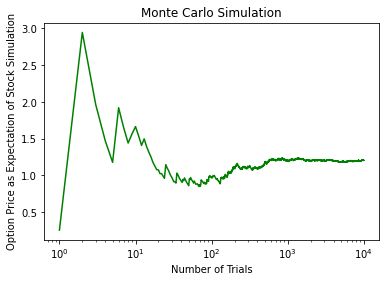

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import math

m = 10000 # Number of Trials
monteCarlo = np.zeros(m, dtype = 'float')

def stock_sim(t, a, u, d, p, q):
    stockChange = np.zeros(t+1, dtype = 'float')
    stockChange[0] = a
    stockChange[1:] = (np.random.choice([u, d], t, p=[p, q]))
    stock = np.cumprod(stockChange)
    return stock

def price_asian_call(t, strike, interestRate, u, d, p, q, numTrials = 1e4):
    v0 = 0
    for i in range(numTrials):
        stock = stock_sim(t, a, u, d, p, q)
        y = np.sum(stock)
        v0 += max(y/(t+1)-strike, 0)
        monteCarlo[i] = v0/((i+1)*((1+interestRate)**t))
    v0 = v0/numTrials # Averaging
    v0 = v0/((1+interestRate)**t) # Normalizing
    return v0
    
t = 3 # Time
a = 4 # First Term
k = 4 # Strike Price
r = 0.25 # Interest Rate
u = 2
d = 1/2
p = 1/2
q = 1/2

times = [i+1 for i in range(m)]
print(price_asian_call(t, k, r, u, d, p, q, m))

plt.plot(times, monteCarlo, color = 'green', linestyle = 'solid')
plt.xscale('log')
plt.title("Monte Carlo Simulation")
plt.ylabel("Option Price as Expectation of Stock Simulation")
plt.xlabel("Number of Trials")
plt.show()